In [2]:
!pip install gdown==4.6.0

  Attempting uninstall: gdown
    Found existing installation: gdown 5.2.0
    Uninstalling gdown-5.2.0:
      Successfully uninstalled gdown-5.2.0


## Lấy data từ Google Drive

In [9]:
import gdown
!mkdir -p content/data
# Download all files
file_ids = [
    '1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8',  # X_train
    '1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT',  # X_test
    '1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y',  # y_train
    '1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv',  # y_test
    '1jVswCczlcW29AQTjqGabfm1queU6g1o_',   # X_tfidf_resampled
    '1Yg89Txu_Kkvz37WifqedLSb6x8Rm7x0c'   # y_resampled
]

file_paths = [
    'content/data/X_train.csv',
    'content/data/X_test.csv',
    'content/data/y_train.csv',
    'content/data/y_test.csv',
    'content/data/X_tfidf_resampled.joblib',
    'content/data/y_resampled.csv'
]
for file_id, file_path in zip(file_ids, file_paths):
    gdown.download(f'https://drive.google.com/uc?id={file_id}', file_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JXdyh-UVveXhBToLJj8ZJNttiJif6zH8
To: /content/content/data/X_train.csv
100%|██████████| 5.03M/5.03M [00:00<00:00, 52.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rtyLyNDBr3sPcyElMhpDPK3qTbNZH1YT
To: /content/content/data/X_test.csv
100%|██████████| 1.34M/1.34M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IkNvEhPFfano0qSDZFWhsmpF3ttC1q0Y
To: /content/content/data/y_train.csv
100%|██████████| 16.9k/16.9k [00:00<00:00, 22.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JlMWumYQP9OIH79dVsCiZ-eavZAhgSzv
To: /content/content/data/y_test.csv
100%|██████████| 4.24k/4.24k [00:00<00:00, 4.96MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jVswCczlcW29AQTjqGabfm1queU6g1o_
To: /content/content/data/X_tfidf_resampled.joblib
100%|██████████| 3.81M/3.81M [00:00<00:00, 57.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Yg89Txu_Kkvz37WifqedLSb6x8Rm7x0c
To: /content/conten

In [10]:
import pandas as pd
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

X_train = pd.read_csv('content/data/X_train.csv', header=0, keep_default_na=False).squeeze()
X_test = pd.read_csv('content/data/X_test.csv', header=0, keep_default_na=False).squeeze()
y_train = pd.read_csv('content/data/y_train.csv', header=0, keep_default_na=False).squeeze()
y_test = pd.read_csv('content/data/y_test.csv', header=0, keep_default_na=False).squeeze()
X_tfidf_resampled = joblib.load('content/data/X_tfidf_resampled.joblib')
y_resampled = pd.read_csv('content/data/y_resampled.csv', header=0, keep_default_na=False).squeeze()


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_tfidf_resampled.shape)
print(y_resampled.shape)

(8457,)
(2115,)
(8457,)
(2115,)
(12524, 1000)
(12524,)


## Chỉ dùng TF-IDF

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'n_estimators': 150}
Test Accuracy: 0.9465721040189126
              precision    recall  f1-score   support

         ham       0.96      0.97      0.96      1566
        junk       0.91      0.88      0.90       549

    accuracy                           0.95      2115
   macro avg       0.94      0.92      0.93      2115
weighted avg       0.95      0.95      0.95      2115



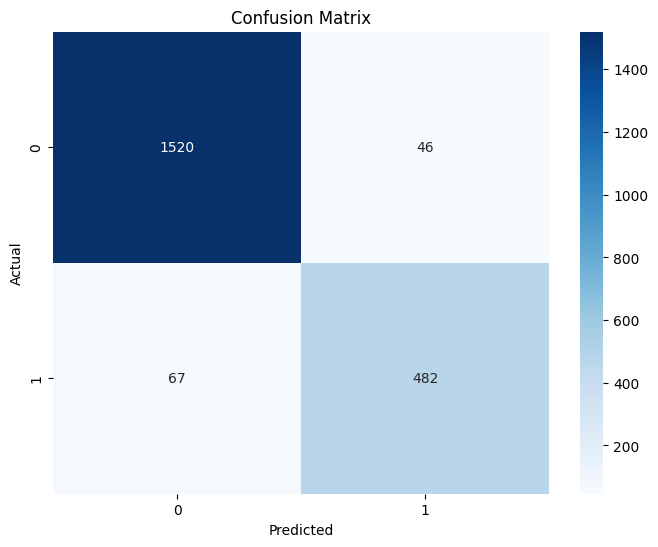

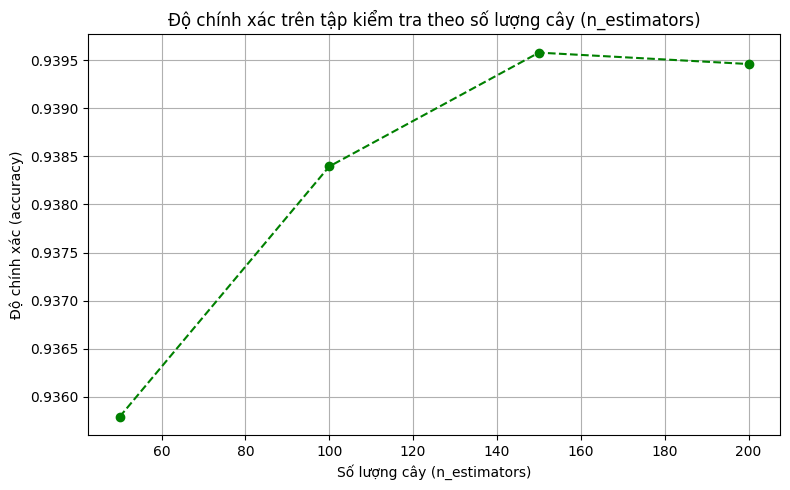

Accuracy for n_estimators = 50: 0.9358
Accuracy for n_estimators = 100: 0.9384
Accuracy for n_estimators = 150: 0.9396
Accuracy for n_estimators = 200: 0.9395
Chiều sâu trung bình của cây: 374.0933333333333
Chiều sâu lớn nhất: 406
Chiều sâu nhỏ nhất: 345


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc và xử lý dữ liệu



# Vector hóa TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Định nghĩa mô hình
model = RandomForestClassifier(random_state=42)

# Tạo grid các siêu tham số
param_grid = {
    'n_estimators': [50, 100, 150, 200],
}

# Grid Search
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred = grid_search.predict(X_test_tfidf)

# Đánh giá
print("Best parameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['ham', 'junk']))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Lấy kết quả từ GridSearchCV
results = grid_search.cv_results_

# Vẽ biểu đồ độ chính xác của từng giá trị n_estimators
n_estimators_list = param_grid['n_estimators']
mean_test_scores = results['mean_test_score']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, mean_test_scores, marker='o', linestyle='--', color='green')
plt.title('Độ chính xác trên tập kiểm tra theo số lượng cây (n_estimators)')
plt.xlabel('Số lượng cây (n_estimators)')
plt.ylabel('Độ chính xác (accuracy)')
plt.grid(True)
plt.tight_layout()
plt.show()

# In độ chính xác của từng giá trị n_estimators
for i, n_estimators in enumerate(n_estimators_list):
    print(f"Accuracy for n_estimators = {n_estimators}: {mean_test_scores[i]:.4f}")

# Xác định chiều sâu các cây trong rừng tốt nhất
best_model = grid_search.best_estimator_
tree_depths = [tree.get_depth() for tree in best_model.estimators_]
print("Chiều sâu trung bình của cây:", np.mean(tree_depths))
print("Chiều sâu lớn nhất:", np.max(tree_depths))
print("Chiều sâu nhỏ nhất:", np.min(tree_depths))


## Kết hợp TF-IDF và Embedding

In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from sentence_transformers import SentenceTransformer
from scipy.sparse import csr_matrix, hstack
from sklearn.decomposition import PCA
import logging
logging.getLogger("huggingface_hub").setLevel(logging.ERROR)
logging.getLogger("sentence_transformers.SentenceTransformer").setLevel(logging.ERROR)

# Tf-idf ở shell trước

# Giảm chiều TF-IDF bằng TruncatedSVD
# svd = TruncatedSVD(n_components=300, random_state=42)
# X_tfidf_reduced = svd.fit_transform(X_tfidf)

# Embedding bằng all-MiniLM-L6-v2
embedder = SentenceTransformer("all-MiniLM-L6-v2")
X_train_embed = embedder.encode(X_train, convert_to_numpy=True)
X_test_embed = embedder.encode(X_test, convert_to_numpy=True)

pca = PCA(n_components=100)  # Giảm còn 100 chiều
X_train_embed_reduced = pca.fit_transform(X_train_embed)
X_test_embed_reduced = pca.transform(X_test_embed)

# Chuẩn hóa cả hai phần
scaler = StandardScaler()
X_train_embed_sparse = csr_matrix(X_train_embed_reduced)  # Convert numpy → sparse
X_train_combined = hstack([X_train_tfidf, X_train_embed_sparse])
X_test_embed_sparse = csr_matrix(X_test_embed_reduced)
X_test_combined = hstack([X_test_tfidf, X_test_embed_sparse])


# Huấn luyện Random Forest
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train_combined, y_train)

# Đánh giá
y_pred = model.predict(X_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=['ham', 'junk']))

# Tính chiều sâu trung bình và số lá trung bình
depths = [estimator.get_depth() for estimator in model.estimators_]
n_leaves = [estimator.get_n_leaves() for estimator in model.estimators_]

print("Chiều sâu trung bình của cây:", np.mean(depths))
print("Số lá trung bình của cây:", np.mean(n_leaves))
print("Chiều sâu lớn nhất:", np.max(depths))
print("Số lá lớn nhất:", np.max(n_leaves))

Accuracy: 0.956501182033097
              precision    recall  f1-score   support

         ham       0.96      0.99      0.97      1566
        junk       0.95      0.87      0.91       549

    accuracy                           0.96      2115
   macro avg       0.96      0.93      0.94      2115
weighted avg       0.96      0.96      0.96      2115

Chiều sâu trung bình của cây: 62.96666666666667
Số lá trung bình của cây: 571.5
Chiều sâu lớn nhất: 115
Số lá lớn nhất: 647


In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import csr_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer

X_train = X_train.squeeze()
X_test = X_test.squeeze()
y_train = y_train.squeeze()
y_test = y_test.squeeze()

class SentenceEmbeddingTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2', n_components=100):
        self.model_name = model_name
        self.n_components = n_components

    def fit(self, X, y=None):
        self.model = SentenceTransformer(self.model_name)
        embeddings = self.model.encode(X.tolist(), convert_to_numpy=True)

        from sklearn.decomposition import PCA
        self.pca = PCA(n_components=self.n_components)
        self.pca.fit(embeddings)
        return self

    def transform(self, X):
        embeddings = self.model.encode(X.tolist(), convert_to_numpy=True)
        reduced = self.pca.transform(embeddings)
        from scipy.sparse import csr_matrix
        return csr_matrix(reduced)

# TF-IDF pipeline
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000))
])

# Embedding pipeline
embed_pipeline = Pipeline([
    ('embedding', SentenceEmbeddingTransformer(n_components=100))
])

# Combine features
combined_features = FeatureUnion([
    ('tfidf_features', tfidf_pipeline),
    ('embedding_features', embed_pipeline)
])

# Final pipeline
full_pipeline = Pipeline([
    ('features', combined_features),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Huấn luyện trên dữ liệu train
full_pipeline.fit(X_train, y_train)

# Dự đoán trên dữ liệu test
y_pred = full_pipeline.predict(X_test)

# Đánh giá kết quả
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=['ham', 'junk'])

## TF-IDF trên resampled dataset

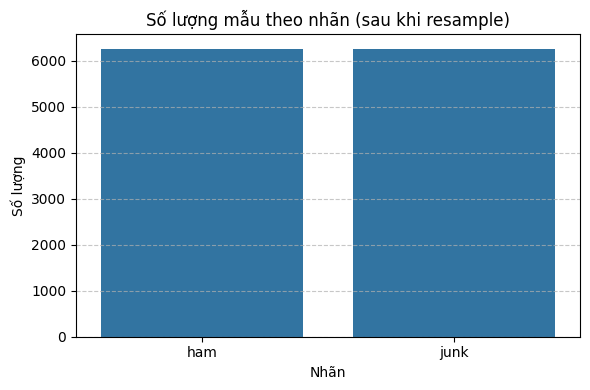

In [19]:
# Biểu đồ so sánh số lượng nhãn trong tập huấn luyện sau khi resample
label_counts = pd.Series(y_resampled).value_counts().sort_index()  # Giữ thứ tự: 0, 1
label_names = ['ham', 'junk']

plt.figure(figsize=(6, 4))
sns.barplot(x=label_names, y=label_counts.values)
plt.title('Số lượng mẫu theo nhãn (sau khi resample)')
plt.ylabel('Số lượng')
plt.xlabel('Nhãn')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Test Accuracy: 0.9484633569739953
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97      1566
        junk       0.89      0.91      0.90       549

    accuracy                           0.95      2115
   macro avg       0.93      0.94      0.93      2115
weighted avg       0.95      0.95      0.95      2115



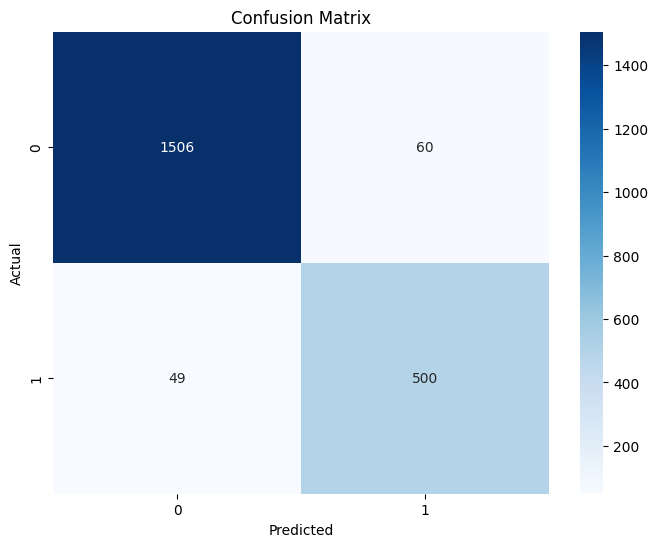

Chiều sâu trung bình của cây: 376.7733333333333
Số lá trung bình của cây: 1226.64
Chiều sâu lớn nhất: 401
Số lá lớn nhất: 1399


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Định nghĩa mô hình
model = RandomForestClassifier(random_state=42, n_estimators=150)

# Huấn luyện
model.fit(X_tfidf_resampled, y_resampled)

# Dự đoán
y_pred = model.predict(X_test_tfidf)

# Đánh giá
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['ham', 'junk']))

# Vẽ confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Tính chiều sâu trung bình và số lá trung bình
depths = [estimator.get_depth() for estimator in model.estimators_]
n_leaves = [estimator.get_n_leaves() for estimator in model.estimators_]

print("Chiều sâu trung bình của cây:", np.mean(depths))
print("Số lá trung bình của cây:", np.mean(n_leaves))
print("Chiều sâu lớn nhất:", np.max(depths))
print("Số lá lớn nhất:", np.max(n_leaves))
